In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.axes as ax

In [ ]:
data = pd.read_csv(r'drive/MyDrive/data_for_lr.csv')

In [ ]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(699, 2)

In [ ]:
train_input = np.array(data.x[:500]).reshape(500,1)
train_output = np.array(data.y[:500]).reshape(500,1)
test_input = np.array(data.x[500:]).reshape(199,1)
test_output = np.array(data.y[500:]).reshape(199,1)

# f(x) = mx + c

In [ ]:
def forward_propagation(train_input, parameters):
  m = parameters['m']
  c = parameters['c']
  predictions = np.multiply(m,train_input) + c
  return predictions

cf = (summation(y - predictions)**2)/2n

In [ ]:
def cost_function(predictions, train_output):
  cf = np.mean((train_output - predictions)**2)*0.5
  return cf

**gradient descent**
*  dcf/dm = dcf/dyp * dyp/dm
*   dcf/dc = dcf/dyp * dyp/dc
*   df = dcf/dyp = (y - prediction)*-1
*   dyp/dm = x
*   dyp/dc = 1

In [ ]:
def gradient_descent(train_input, train_output, predictions):
  derivatives = dict()
  df = (train_output - predictions)*-1
  derivatives['m'] = np.mean(np.multiply(train_input, df))
  derivatives['c'] = np.mean(df)
  return derivatives

Updating m and c

In [ ]:
def updater(parameters, derivatives, learning_rate):
  parameters['m'] = parameters['m'] - (learning_rate * derivatives['m'])
  parameters['c'] = parameters['c'] - (learning_rate * derivatives['c'])
  return parameters

Training the model

In [ ]:
def train_model(train_input, train_output, learning_rate, iters):

    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()
    loss = list()

    for i in range(iters):

        predictions = forward_propagation(train_input, parameters)
        cost = cost_function(predictions, train_output)

        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = gradient_descent(train_input, train_output, predictions)

        #update parameters
        parameters = updater(parameters, derivatives, learning_rate)

    return parameters, loss

Iteration = 1, Loss = 4408.02141100998


<Figure size 640x480 with 0 Axes>

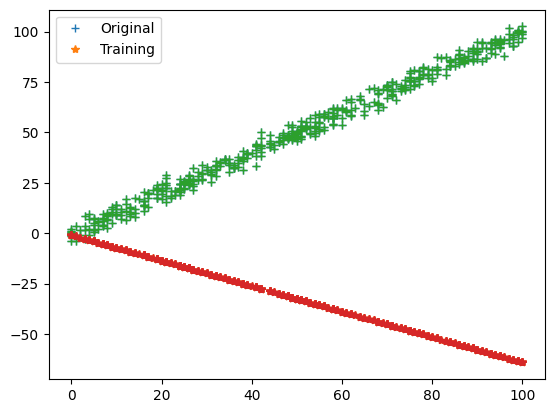

Iteration = 2, Loss = 2002.0911723771878


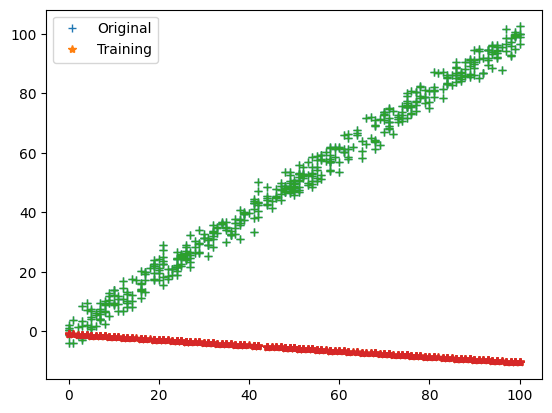

Iteration = 3, Loss = 910.51795665301


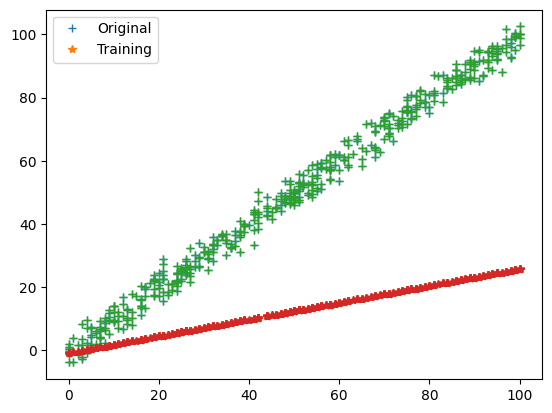

Iteration = 4, Loss = 415.2699780585576


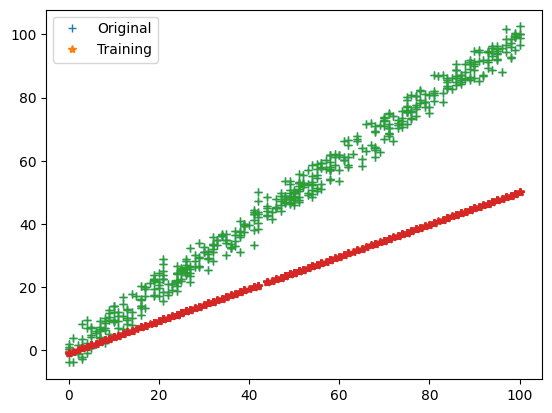

Iteration = 5, Loss = 190.57542006434903


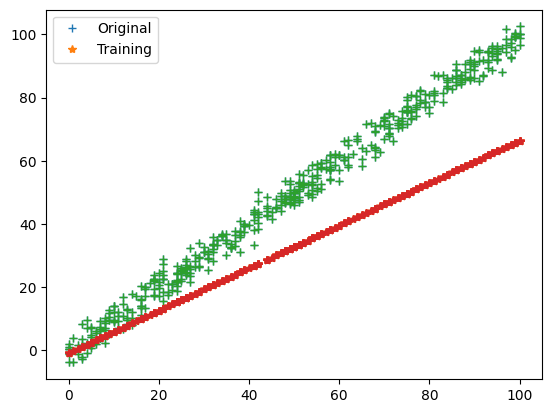

Iteration = 6, Loss = 88.63124867266859


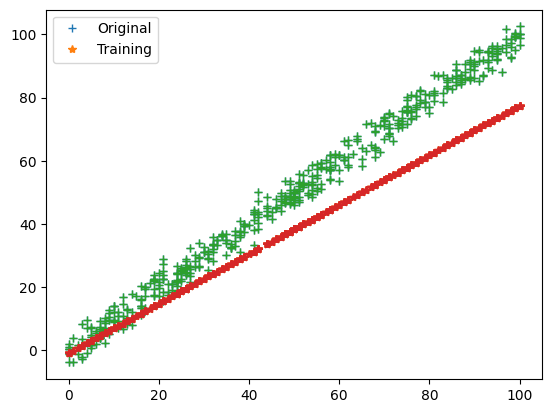

Iteration = 7, Loss = 42.3790636460203


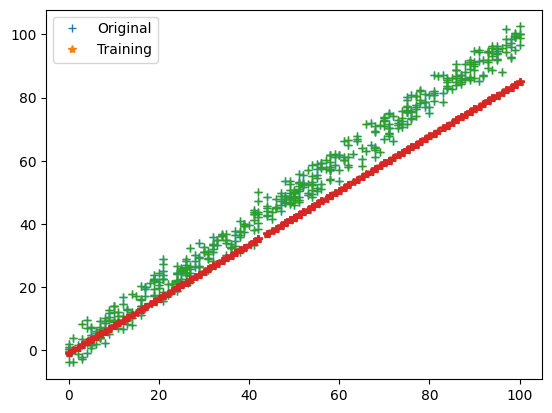

Iteration = 8, Loss = 21.39439452000461


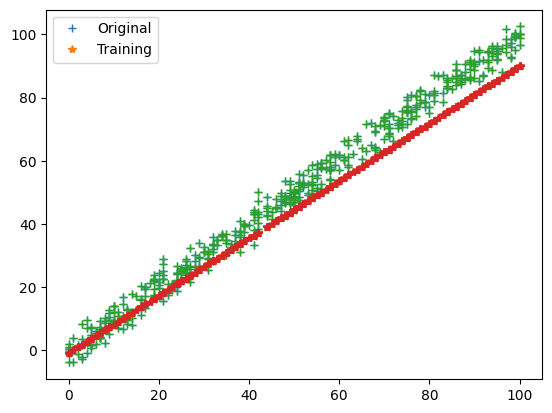

Iteration = 9, Loss = 11.873625345525838


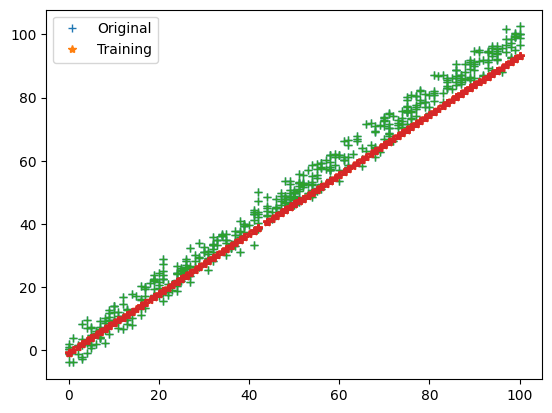

Iteration = 10, Loss = 7.554040277025481


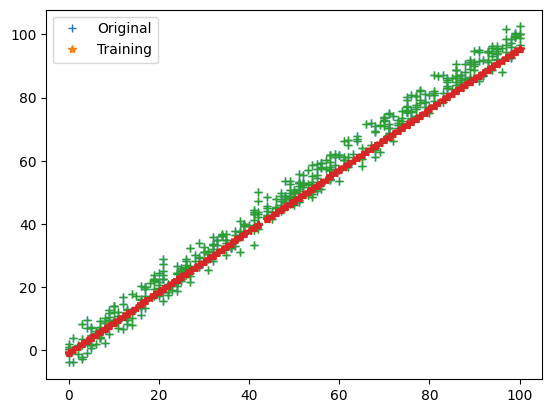

Iteration = 11, Loss = 5.594238198531397


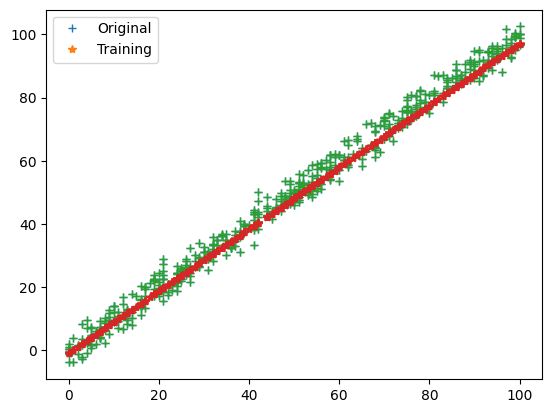

Iteration = 12, Loss = 4.705072276474058


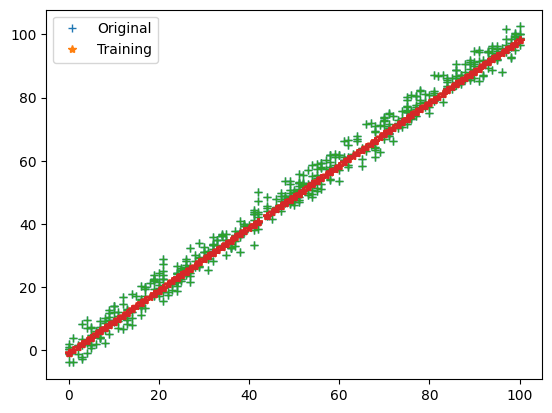

Iteration = 13, Loss = 4.30165516455078


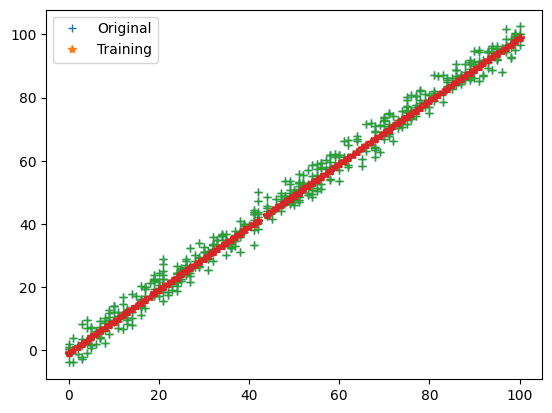

Iteration = 14, Loss = 4.118622825898729


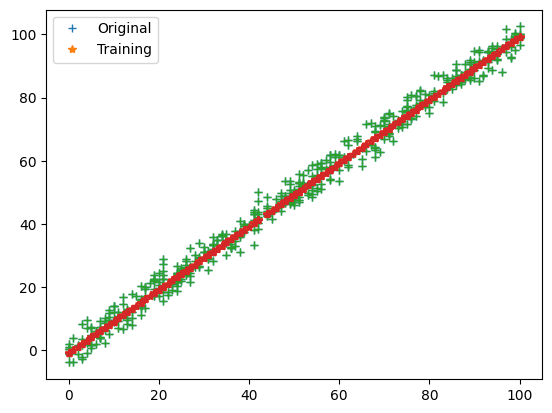

Iteration = 15, Loss = 4.035579303065067


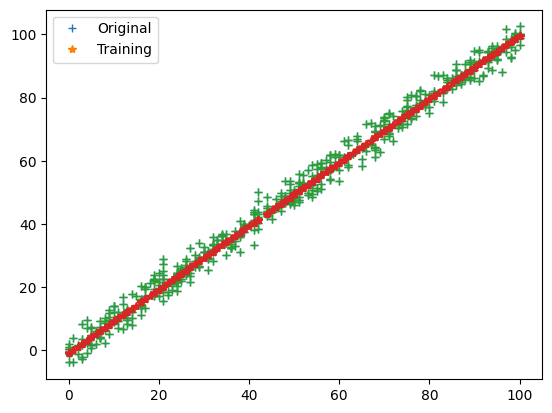

Iteration = 16, Loss = 3.9979008167979306


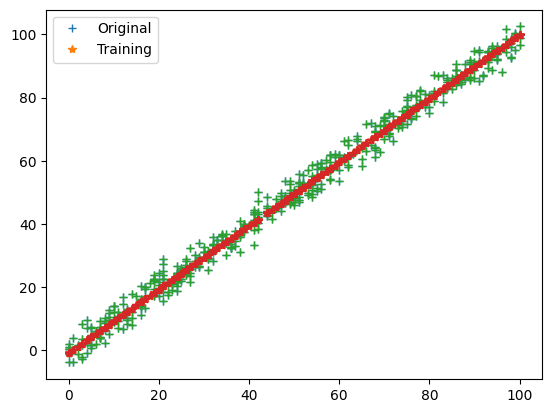

Iteration = 17, Loss = 3.9808044979471826


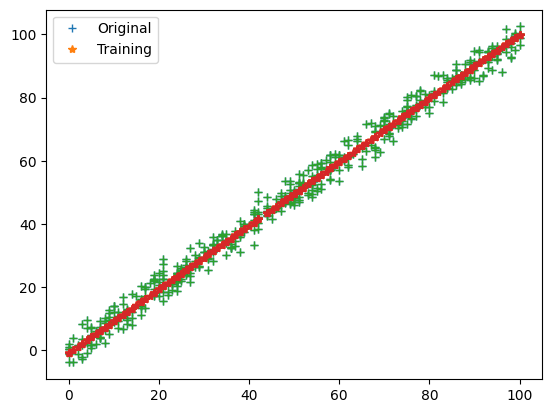

Iteration = 18, Loss = 3.97304633132888


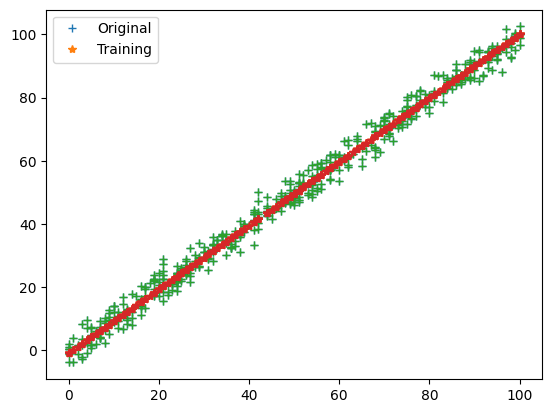

Iteration = 19, Loss = 3.9695248947997306


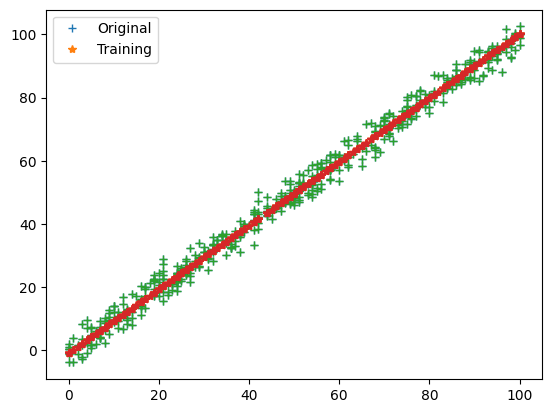

Iteration = 20, Loss = 3.9679256674827714


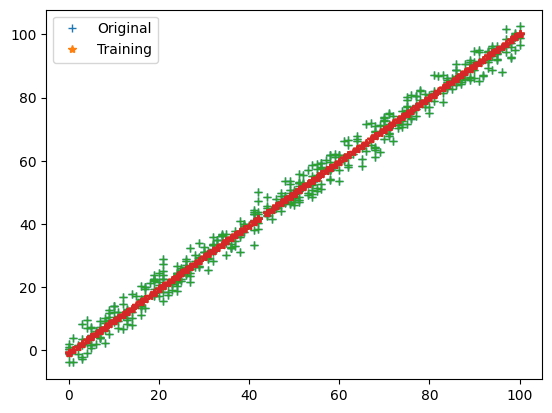

In [ ]:
parameters, loss = train_model(train_input, train_output, 0.0001, 20)

In [ ]:
print(parameters)

{'m': 1.0105092347915134, 'c': -0.9042141845379001}


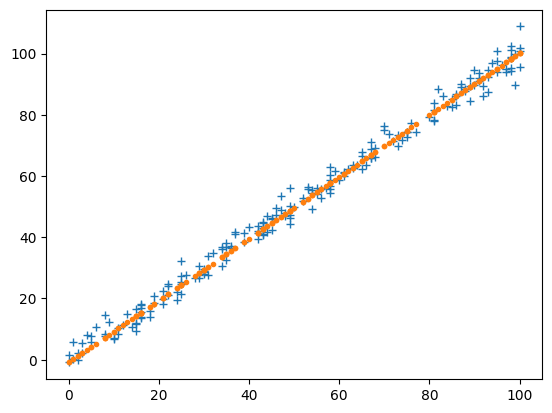

In [ ]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [ ]:
cost_function(test_predictions, test_output)

4.155372097233165